In [1]:
import pickle
import numpy as np 
import tensorflow as tf
import timeit
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.python.framework import ops
#from cnn_utils import *
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

In [45]:
#Step 1: define a function to load traing batch data from directory
def load_training_batch(folder_path,batch_id):
    with open(folder_path + "data_batch_" + str(batch_id), 'rb') as fo:
        train_dict = pickle.load(fo, encoding = 'latin1')
    ###fetch features using the key ['data']###
    features = train_dict['data']
    ###fetch labels using the key ['labels']###
    labels = train_dict['labels']
    return features,labels

In [46]:
#Step 2: define a function to load testing data from directory
def load_testing_batch(folder_path):

    ###load batch using pickle###
    with open(folder_path + "test_batch", 'rb') as fo:
        test_dict = pickle.load(fo, encoding = 'latin1')
    ###fetch features using the key ['data']###
    features = test_dict['data']
    ###fetch labels using the key ['labels']###
    labels = test_dict['labels']
    return features,labels

In [47]:
#Step 3: define a function that returns a list that contains label names (order is matter)
"""
    airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
"""
def load_label_names():
    label_List = np.array(["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
    return label_List

In [48]:
#Step 6: define a function that does min-max normalization on input
def normalize(x):
    return (x - x.min())/(x.max() - x.min())

In [49]:
#Step 7: define a function that does one hot encoding on input
def one_hot_encoding(x):
    NUM_CLASSES = 10
    one_hot_encoding_matrix = np.zeros([len(x), NUM_CLASSES])
    #return np.eye(x.size)[x]
    for i in range(0, len(x)):
        one_hot_encoding_matrix[i, x[i]] = 1
        
    return one_hot_encoding_matrix

In [50]:
#Step 8: define a function that perform normalization, one-hot encoding and save data using pickle
def preprocess_and_save(features,labels,filename):
    normal_feature = normalize(features)
    one_hot_labels = one_hot_encoding(labels)
    
    preprocessed_dict = {'normal feature': normal_feature, 'one hot labels': one_hot_labels}
    with open(filename, 'wb') as handle:
        pickle.dump(preprocessed_dict, handle, protocol = pickle.HIGHEST_PROTOCOL)  #Make sure about this operation

In [51]:
#Step 9:define a function that preprocesss all training batch data and test data. 
#Use 10% of your total training data as your validation set
#In the end you should have 5 preprocessed training data, 1 preprocessed validation data and 1 preprocessed test data
def preprocess_data(folder_path):
    raw_train_data_feature1, raw_train_data_label1 = load_training_batch(folder_path,1)
    raw_train_data_feature2, raw_train_data_label2 = load_training_batch(folder_path,2)
    raw_train_data_feature3, raw_train_data_label3 = load_training_batch(folder_path,3)
    raw_train_data_feature4, raw_train_data_label4 = load_training_batch(folder_path,4)
    raw_train_data_feature5, raw_train_data_label5 = load_training_batch(folder_path,5)
    
    raw_test_data_feature, raw_test_data_label = load_testing_batch(folder_path)
    
    #build the validation data: 10% of 50000 = 5000
    raw_validate_data_features = raw_train_data_feature1[0:5000, :]
    raw_validate_data_label = raw_train_data_label1[0:5000]
    preprocess_and_save(raw_train_data_feature1, raw_train_data_label1, 'processed_train1')
    preprocess_and_save(raw_train_data_feature2, raw_train_data_label2, 'processed_train2')
    preprocess_and_save(raw_train_data_feature3, raw_train_data_label3, 'processed_train3')
    preprocess_and_save(raw_train_data_feature4, raw_train_data_label4, 'processed_train4')
    preprocess_and_save(raw_train_data_feature5, raw_train_data_label5, 'processed_train5')
    
    preprocess_and_save(raw_test_data_feature, raw_test_data_label, 'processed_test')
    
    preprocess_and_save(raw_validate_data_features, raw_validate_data_label, 'processed_validate')

In [52]:
#folder_path = '/home/jupyter/cifar-10-batches-py/'
#preprocess_data(folder_path)

In [53]:
valid_dict  = pickle.load(open('processed_validate','rb'))
train_dict1 = pickle.load(open('processed_train1', 'rb'))
train_dict2 = pickle.load(open('processed_train2', 'rb'))
train_dict3 = pickle.load(open('processed_train3', 'rb'))
train_dict4 = pickle.load(open('processed_train4', 'rb'))
train_dict5 = pickle.load(open('processed_train5', 'rb'))
test_dict   = pickle.load(open('processed_test', 'rb'))

valid_features = valid_dict['normal feature']
valid_labels   = valid_dict['one hot labels']

train_features1 = train_dict1['normal feature']
train_labels1   = train_dict1['one hot labels']
train_features2 = train_dict1['normal feature']
train_labels2   = train_dict1['one hot labels']
train_features3 = train_dict1['normal feature']
train_labels3   = train_dict1['one hot labels']
train_features4 = train_dict1['normal feature']
train_labels4   = train_dict1['one hot labels']
train_features5 = train_dict1['normal feature']
train_labels5   = train_dict1['one hot labels']

test_features   = test_dict['normal feature']
test_labels     = test_dict['one hot labels']

totalX = np.concatenate((train_features1,train_features2,train_features3,train_features4,train_features5))
totalY = np.concatenate((train_labels1,train_labels2,train_labels3,train_labels4,train_labels5))
#Check
print(np.shape(totalX))
print(np.shape(totalY))
print(np.shape(valid_features))
print(np.shape(test_features))
#Reshape
totalX = np.reshape(totalX, (50000,32,32,3))
print(np.shape(totalX))

(50000, 3072)
(50000, 10)
(5000, 3072)
(10000, 3072)
(50000, 32, 32, 3)


In [54]:
x_train = totalX
y_train = totalY
x_validation = np.reshape(valid_features, (5000,32,32,3))
y_validation = valid_labels
x_test = np.reshape(test_features, (10000,32,32,3))
y_test = test_labels
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_validation))
print(np.shape(y_validation))
print(np.shape(x_test))
print(np.shape(y_test))

mini_batch1 = x_train[0:1000,:]
print(np.shape(mini_batch1))

(50000, 32, 32, 3)
(50000, 10)
(5000, 32, 32, 3)
(5000, 10)
(10000, 32, 32, 3)
(10000, 10)
(1000, 32, 32, 3)


In [55]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """

    ### START CODE HERE ### (≈2 lines)
    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, [None, n_y])
    ### END CODE HERE ###
    
    return X, Y

In [120]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 2 lines of code)
    W1 = tf.get_variable("W1", [5,5,3,8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [2,2,8,16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [156]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    ### START CODE HERE ###
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, sride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1,2,2,1], strides = [1,1,1,1], padding = 'SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1,2,2,1], strides = [1,1,1,1], padding = 'SAME')
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 10 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P2, 10, activation_fn = None)
    #Z4 = tf.contrib.layers.fully_connected(Z3, 84, activation_fn = tf.nn.relu)
    #Z5 = tf.contrib.layers.fully_connected(Z4, 10, activation_fn = None)
    ### END CODE HERE ###

    return Z3

In [157]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    ### END CODE HERE ###
    
    return cost

In [158]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    #permutation = list(np.random.permutation(m))
    #shuffled_X = X[permutation,:,:,:]
    #shuffled_Y = Y[permutation,:]
    #Try not shuffling:
    shuffled_X = X
    shuffled_Y = Y
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [165]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 15, minibatch_size = 128, print_cost = True):
    
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            #seed = seed + 1
            #minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            #print(num_minibatches)
            for k in range(num_minibatches - 1):

                # Select a minibatch
                #(minibatch_X, minibatch_Y) = minibatch
                minibatch_X = X_train[k * minibatch_size : k * minibatch_size + minibatch_size,:,:,:]
                minibatch_Y = Y_train[k * minibatch_size : k * minibatch_size + minibatch_size,:]
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                sess.run(optimizer, feed_dict = {X: minibatch_X, Y: minibatch_Y})
                _ , temp_cost = sess.run([optimizer, cost], feed_dict = {X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 1 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
            if epoch % 1 == 0:
                # Calculate the correct predictions
                predict_op = tf.argmax(Z3, 1)
                correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

                # Calculate accuracy on the test set
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                #print(accuracy)
                #train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
                test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
                #print("Train Accuracy:", train_accuracy)
                print("Test Accuracy during Training:", test_accuracy)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        #print(accuracy)
        #train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        #print("Train Accuracy:", train_accuracy)
        print("Training is finished")
        print("Test Accuracy:", test_accuracy)
                
        return test_accuracy, parameters

Cost after epoch 0: 1.772527
Test Accuracy during Training: 0.4413
Cost after epoch 1: 1.447033
Test Accuracy during Training: 0.4715
Cost after epoch 2: 1.340347
Test Accuracy during Training: 0.484
Cost after epoch 3: 1.263813
Test Accuracy during Training: 0.4906
Cost after epoch 4: 1.198053
Test Accuracy during Training: 0.4967
Cost after epoch 5: 1.138548
Test Accuracy during Training: 0.5024
Cost after epoch 6: 1.083593
Test Accuracy during Training: 0.5093
Cost after epoch 7: 1.032157
Test Accuracy during Training: 0.5137
Cost after epoch 8: 0.983623
Test Accuracy during Training: 0.517
Cost after epoch 9: 0.937530
Test Accuracy during Training: 0.5192
Cost after epoch 10: 0.893507
Test Accuracy during Training: 0.5225
Cost after epoch 11: 0.851296
Test Accuracy during Training: 0.5243
Cost after epoch 12: 0.810629
Test Accuracy during Training: 0.5239
Cost after epoch 13: 0.771384
Test Accuracy during Training: 0.5228
Cost after epoch 14: 0.733405
Test Accuracy during Training:

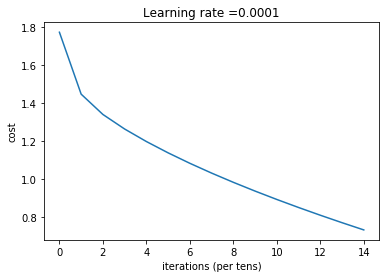

Training is finished
Test Accuracy: 0.5215


(0.5215,
 {'W1': <tf.Variable 'W1:0' shape=(5, 5, 3, 8) dtype=float32_ref>,
  'W2': <tf.Variable 'W2:0' shape=(2, 2, 8, 16) dtype=float32_ref>})

In [166]:
#x_train1 = x_train[0:10000,:]
#y_train1 = y_train[0:10000,:]
#x_test1  = x_test[0:10000,:] 
#y_test1  = y_test[0:10000,:]
#print(np.shape(x_train1))
#print(np.shape(y_train1))
#print(np.shape(x_train))
#print(np.shape(y_train))
model(x_train, y_train, x_test, y_test)